In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn import preprocessing

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
tc = data.copy()

In [4]:
tc.shape

(7043, 21)

customerID - customer id

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

Dependents: if the customer lives with any dependents (Yes, No)

tenure - how many months a person has been a client of the company

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client's Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

Contract - type of customer contract (Month-to-month, One year, Two year)

PaperlessBilling - whether the client uses paperless billing (Yes, No)

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - current monthly payment

TotalCharges - the total amount that the client paid for the services for the entire time

Churn - whether there was a churn (Yes or No)

In [5]:
tc.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
tc.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
tc.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
tc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
tc["TotalCharges"] = pd.to_numeric(tc["TotalCharges"] , errors = "coerce")

In [11]:
tc['TotalCharges'] = tc['TotalCharges'].fillna(tc['TotalCharges'].median())

In [12]:
tc['SeniorCitizen'] = tc['SeniorCitizen'].astype('category')

In [13]:
tc.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# EDA - Univariate analysis

In [14]:
def boxplot(x):
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=tc, x="Churn", y=tc[x], palette="PuBu")
    plt.show()

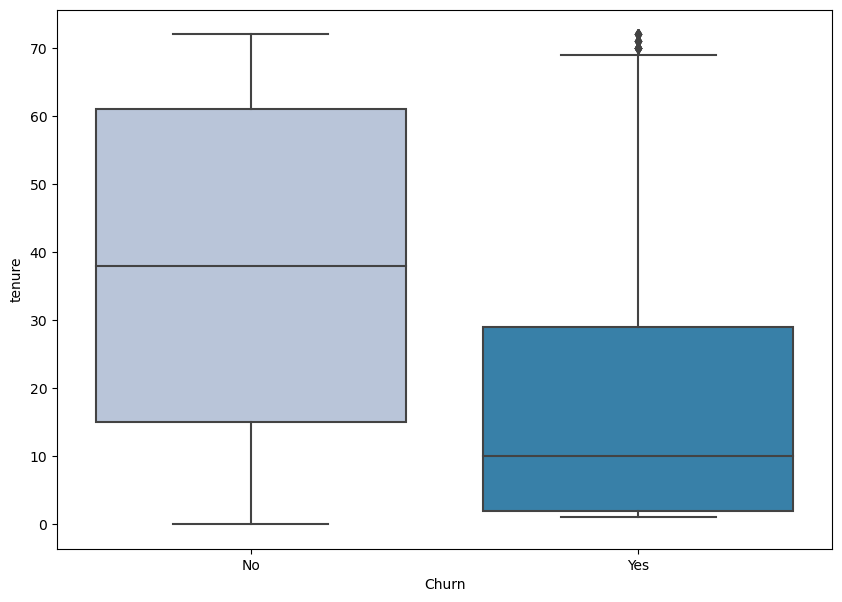

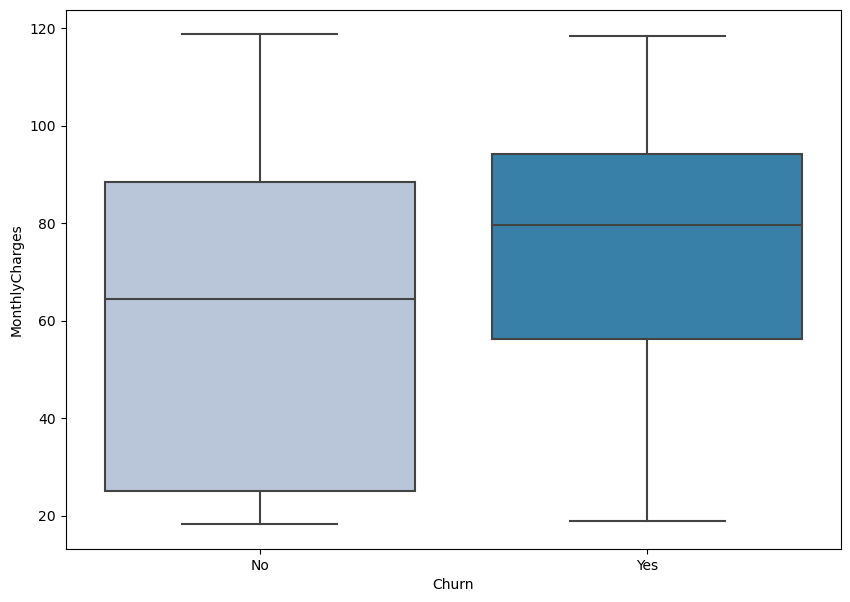

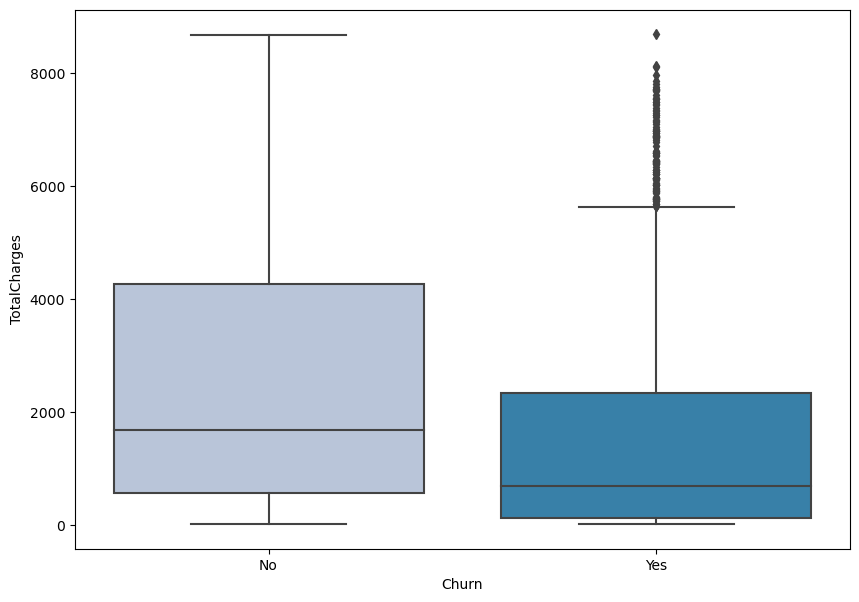

In [15]:
boxplot("tenure")
boxplot("MonthlyCharges")
boxplot("TotalCharges")

### churn customer has short tenure and high Monthly chargers but low totalchargers(with some Outliers)

# EDA - Bivariate Analysis

In [16]:
data_category = tc.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)

ValueError: Image size of 580x147615 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

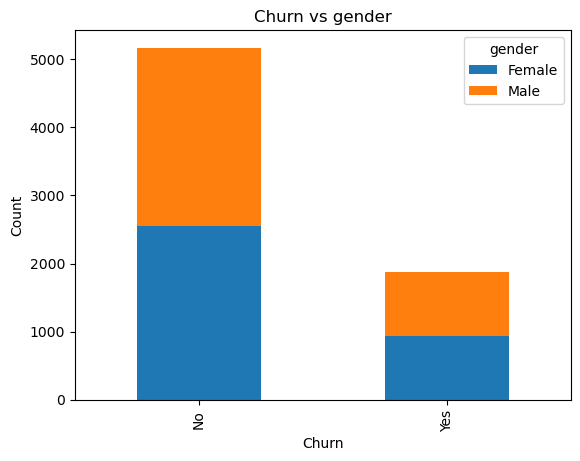

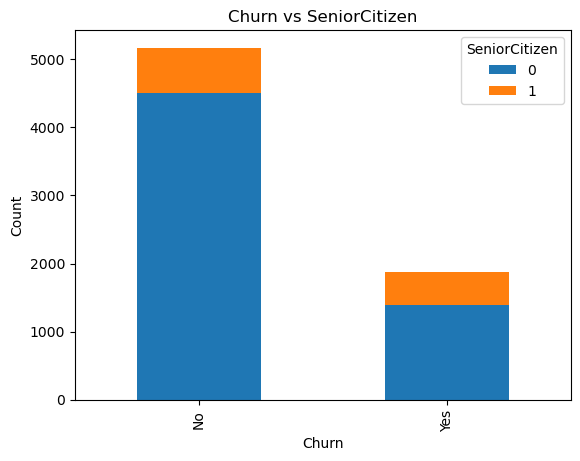

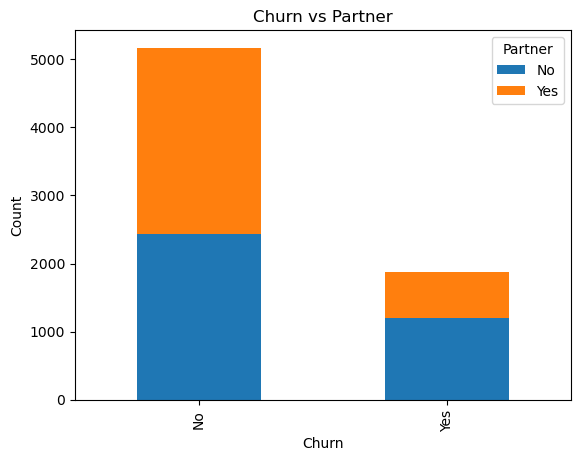

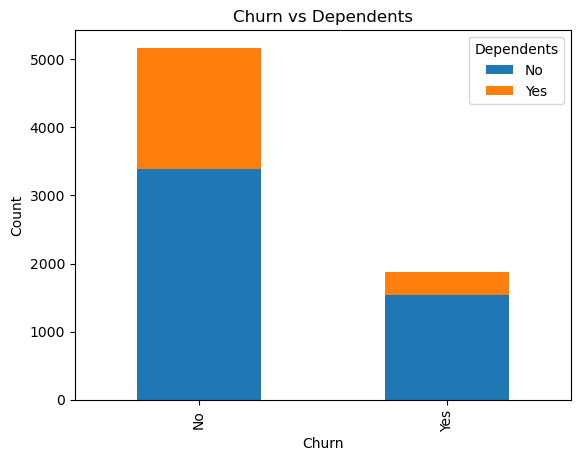

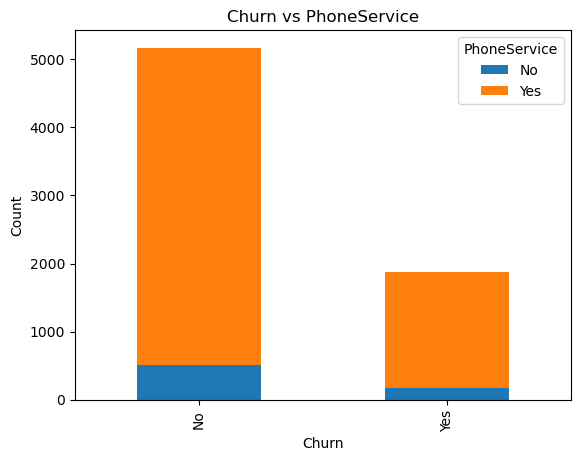

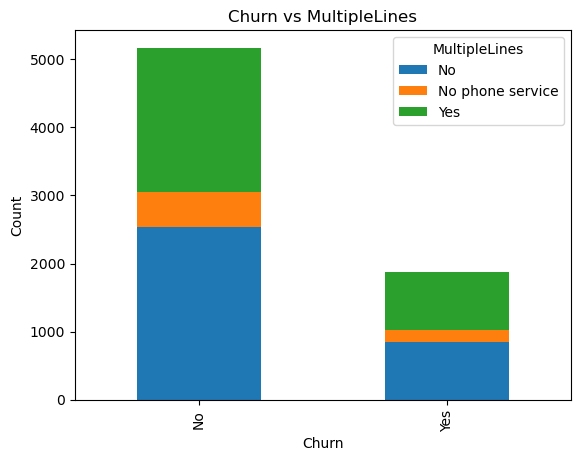

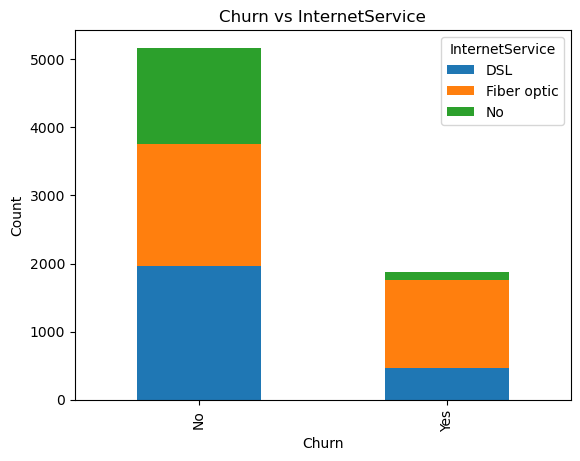

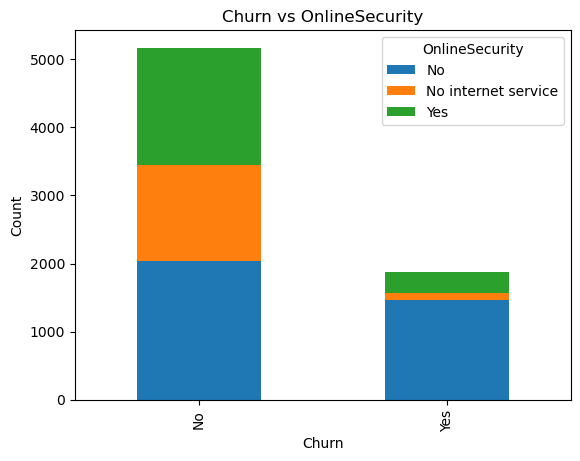

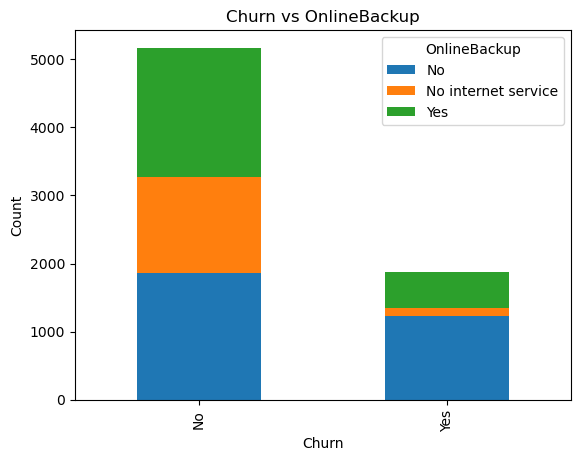

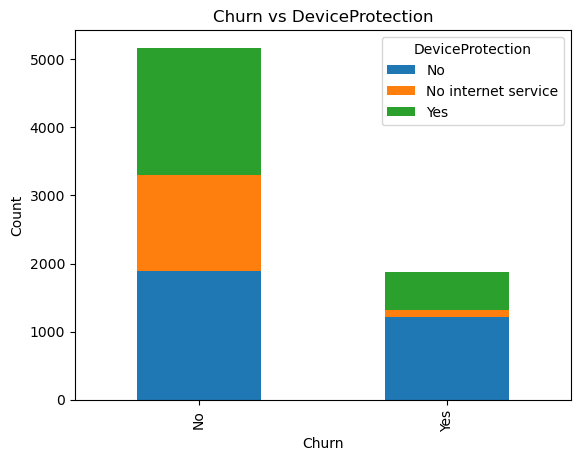

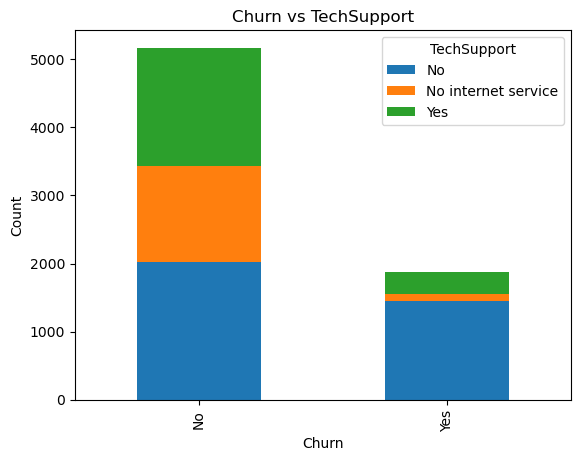

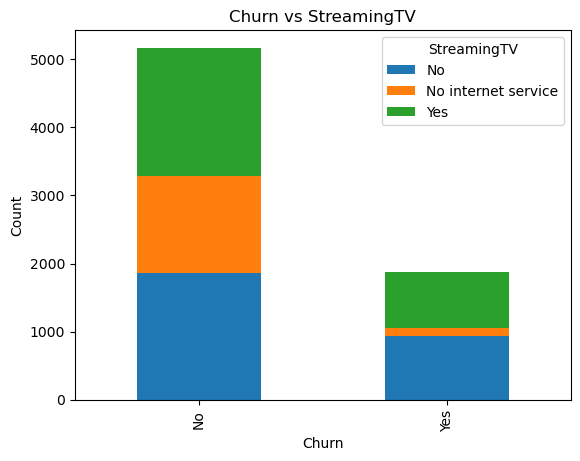

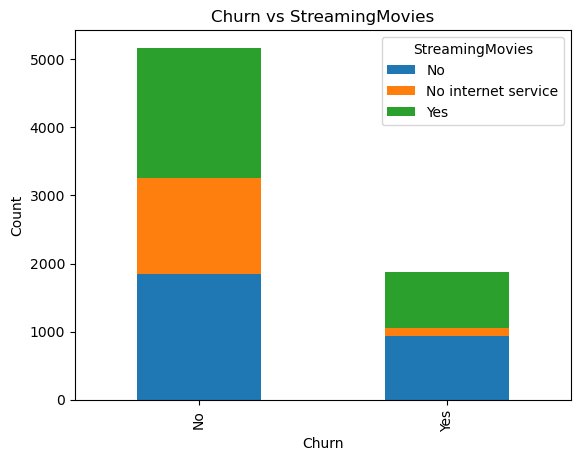

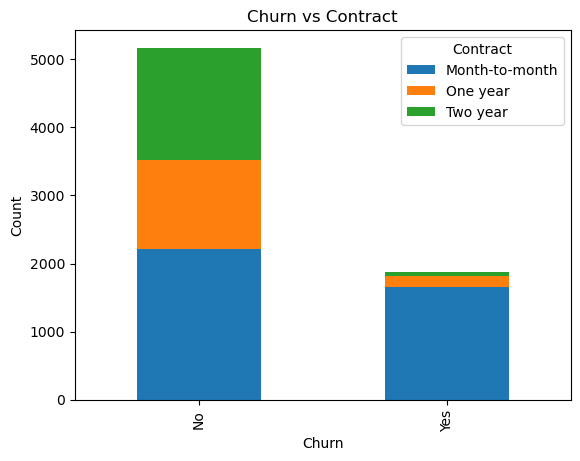

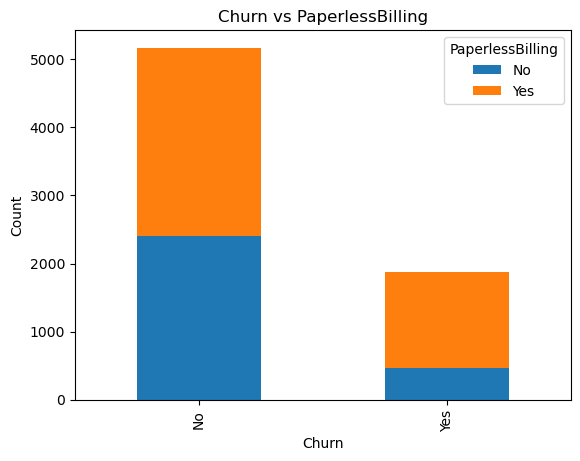

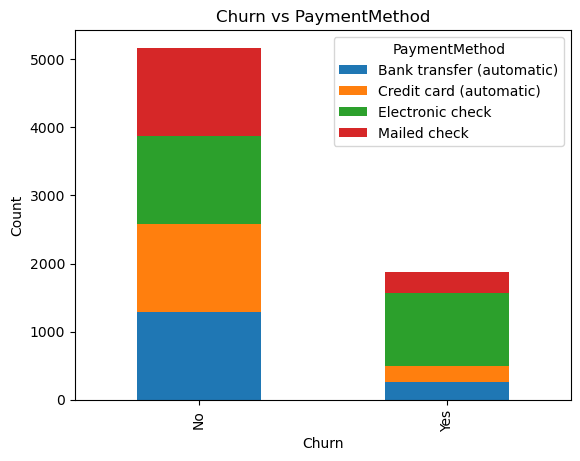

In [17]:
for col in data_category.columns:
    if col != 'Churn':
        ct = pd.crosstab(data_category['Churn'], data_category[col])
        ct.plot(kind='bar', stacked=True)
        plt.xlabel('Churn')
        plt.ylabel('Count')
        plt.title('Churn vs ' + col)
        plt.show()

## Observation
    1. Most of churned customer are more likely has a partner and has the month to month contract, Electronic check, paperless billing,phoneService device protection, Fiberopticm.

    2. Most of retained customer has techSupport, Online backup,online security, dependents.

# Modelling

#### Since most of variables are catergory, we need to make dummy variables

In [18]:
tc = pd.get_dummies(tc, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [19]:
tc = pd.get_dummies(tc, columns=['Churn'], drop_first=True)

### Removing outliers
Observations that extend more than 3 times standard devation of the varaible in any direction will be replaced with value of the closest observation

In [20]:
x_names = tc[['tenure', 'MonthlyCharges', 'TotalCharges']]
def outliers(x):                
  l_b = x.mean()-3*x.std() 
  u_b = x.mean()+3*x.std()
  x_u = x.index[x>u_b]
  x_l = x.index[x<l_b]
  x.loc[x_u] = max(x.drop(x_u, axis=0))
  x.loc[x_l] = min(x.drop(x_l, axis=0))
  return x
for i in x_names:
  if i != 'Churn_Yes':
    tc[i] = outliers(tc[i])

In [21]:
tc.head(10)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1
5,9305-CDSKC,0,8,99.65,820.50,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1
6,1452-KIOVK,0,22,89.10,1949.40,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
7,6713-OKOMC,0,10,29.75,301.90,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
8,7892-POOKP,0,28,104.80,3046.05,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,1
9,6388-TABGU,0,62,56.15,3487.95,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,0


In [22]:
tc = tc.drop(['customerID'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split

X = tc.drop('Churn_Yes', axis=1)
y = tc['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5925 to 5157
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   SeniorCitizen                            4930 non-null   category
 1   tenure                                   4930 non-null   int64   
 2   MonthlyCharges                           4930 non-null   float64 
 3   TotalCharges                             4930 non-null   float64 
 4   gender_Female                            4930 non-null   uint8   
 5   gender_Male                              4930 non-null   uint8   
 6   Partner_No                               4930 non-null   uint8   
 7   Partner_Yes                              4930 non-null   uint8   
 8   Dependents_No                            4930 non-null   uint8   
 9   Dependents_Yes                           4930 non-null   uint8   
 10  PhoneService_No                  

# Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a customer will not will not leave (churn_no) but in reality the customer will leave (FN).
2. Predicting a customer will leave (churn_yes) but in reality the customer would not leave (churn_no).(FP)

### Which case is more important?
Predicting a customer will not will not leave (churn_no) but in reality the customer will leave (FN).

### Which metric to optimize?

We would want Recall to be maximized, because high recall means that the model is able to identify a large proportion of customers who are at risk of leaving, giving the business an opportunity to intervene and retain those customers. On the other hand, low recall means that the model is not identifying a significant number of customers who are at risk of leaving, resulting in missed opportunities for the business to retain those customers.

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [26]:
# function to create Confusion matrix
def make_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

### Decision Tree model

In [27]:
# Fitting the model
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
# Calculating different metrics
dTree_model_train_perf = model_performance_classification(dTree, X_train, y_train)
print("Training performance:\n", dTree_model_train_perf)
dTree_model_test_perf = model_performance_classification(dTree, X_test, y_test)
print("Testing performance:\n", dTree_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.997972  0.992543        1.0  0.996257
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.729768  0.50947   0.462995  0.485122


### The decision tree is overfitting the training data as there is a huge difference between training and test scores for all the metrics.

### The test recall is very low i.e. only 50.9%

## Confusion matrix for test data

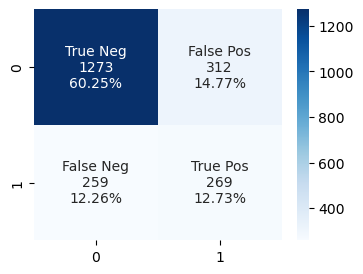

In [29]:
# Creating confusion matrix
make_confusion_matrix(dTree, X_test, y_test, figsize=(4, 3))

### Tuning the Tree, using Hyperparameters and Grid Search, coupled with Cross-validation

In [30]:
# Choose the type of classifier.
dTree_tuned = DecisionTreeClassifier(
    class_weight={0: 0.35, 1: 0.65}, random_state=1
)  # using reverse class weights

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 8, 1),
    "min_samples_leaf": [4, 7, 10],
    "max_leaf_nodes": [3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(
    metrics.recall_score
)  # Note that Recall is chosen here as the scorer.

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters (which achieves the best score)
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=4, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.742191  0.781506   0.517275  0.622513
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.751538  0.80303   0.501775  0.617626


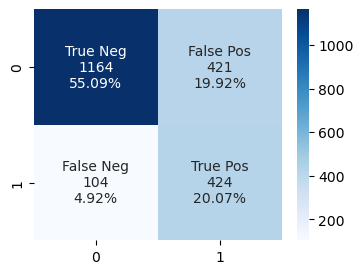

In [31]:
# Calculating different metrics
dTree_tuned_model_train_perf = model_performance_classification(
    dTree_tuned, X_train, y_train
)
print("Training performance:\n", dTree_tuned_model_train_perf)
dTree_tuned_model_test_perf = model_performance_classification(
    dTree_tuned, X_test, y_test
)
print("Testing performance:\n", dTree_tuned_model_test_perf)
# Creating confusion matrix for test data
make_confusion_matrix(dTree_tuned, X_test, y_test, figsize = (4,3))

### The test recall has increased significantly after hyperparameter tuning and the decision tree is giving a generalized performance.

## Let us try ensemble methods

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.981744  0.943326   0.989054  0.965649
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.788452  0.477273   0.595745  0.529968


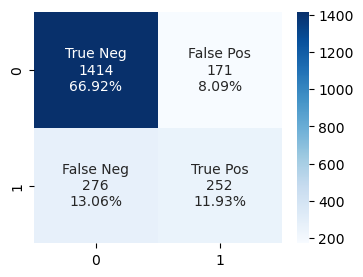

In [32]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification(
    bagging_classifier, X_test, y_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)
# Creating confusion matrix
make_confusion_matrix(bagging_classifier, X_test, y_test, figsize=(4, 3))

#### Bagging classifier is also overfitting the data and recall is low on test set

### Tuning Bagging Classifier

In [33]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [ 30, 40, 50, 60,70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996957  0.991797   0.997001  0.994393
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.802177  0.539773   0.619565  0.576923


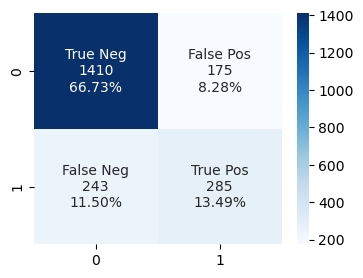

In [34]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned, X_test, y_test, figsize=(4, 3))

#### The test recall has Increased slightly after hyperparameter tuning and the model is still overfitting the training data.

The confusion matrix shows that the model is not good at identifying custmers who are at risk of churn

## Random Forest Model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.997972  0.996271   0.996271  0.996271
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.799337  0.55303   0.608333  0.579365


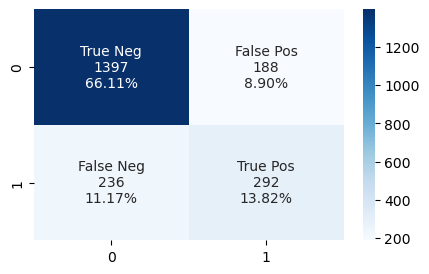

In [35]:
# Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

# Calculating different metrics
rf_model_train_perf = model_performance_classification(rf, X_train, y_train)
print("Training performance:\n", rf_model_train_perf)
rf_model_test_perf = model_performance_classification(rf, X_test, y_test)
print("Testing performance:\n", rf_model_test_perf)

# Creating confusion matrix
make_confusion_matrix(rf, X_test, y_test, figsize=(5, 3))

### Random forest is also overfitting and recall is low, We should try to improve the models by tuning the Hyperparameters

### Tuning Random Forest

In [36]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, random_state=1)

parameters = {
    "max_depth": list(np.arange(3, 10, 1)),
    "max_features": np.arange(0.5, 0.8, 0.1),
    "max_samples": np.arange(0.8, 1, 0.1),
    "min_samples_split": np.arange(3, 15, 3),
    "n_estimators": np.arange(20, 100, 20),
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-4)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=3,
                       max_features=0.7, max_samples=0.8,
                       min_impurity_decrease=0.01, min_samples_split=3,
                       n_estimators=20, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756592  0.744221   0.538005  0.624531
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.769522  0.768939   0.526589  0.625096


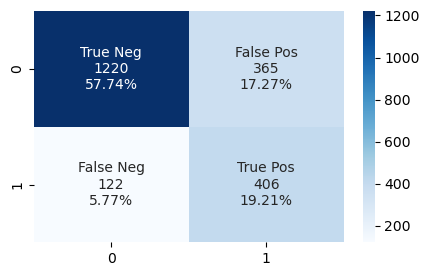

In [37]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification(rf_tuned, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
make_confusion_matrix(rf_tuned, X_test, y_test, figsize=(5, 3))

# Comparing all the models

In [38]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dTree_model_test_perf.T,
        dTree_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_model_test_perf.T,
        rf_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Estimator Tuned,Random Forest Estimator,Random Forest Tuned
Accuracy,0.729768,0.751538,0.788452,0.802177,0.799337,0.769522
Recall,0.509470,0.803030,0.477273,0.539773,0.553030,0.768939
Precision,0.462995,0.501775,0.595745,0.619565,0.608333,0.526589
F1,0.485122,0.617626,0.529968,0.576923,0.579365,0.625096


### The Decision Tree Tuned is the best model for our data as it has the highest Recall and giving a generalized performance as compared to other models.

# Our model can detect 75% of turned customers and can be used by Telco to taking action to prevent it !

### Feature importance of tuned decision tree

In [39]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dTree_tuned, feature_names=feature_names, show_weights=True))

|--- Contract_Month-to-month <= 0.50
|   |--- MonthlyCharges <= 93.67
|   |   |--- OnlineSecurity_No <= 0.50
|   |   |   |--- weights: [443.10, 22.10] class: 0
|   |   |--- OnlineSecurity_No >  0.50
|   |   |   |--- weights: [113.05, 26.65] class: 0
|   |--- MonthlyCharges >  93.67
|   |   |--- tenure <= 70.50
|   |   |   |--- weights: [108.85, 54.60] class: 0
|   |   |--- tenure >  70.50
|   |   |   |--- weights: [48.30, 3.25] class: 0
|--- Contract_Month-to-month >  0.50
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- tenure <= 5.50
|   |   |   |--- weights: [105.35, 146.25] class: 1
|   |   |--- tenure >  5.50
|   |   |   |--- weights: [200.55, 83.85] class: 0
|   |--- InternetService_Fiber optic >  0.50
|   |   |--- TotalCharges <= 1539.62
|   |   |   |--- weights: [86.80, 354.25] class: 1
|   |   |--- TotalCharges >  1539.62
|   |   |   |--- weights: [150.15, 180.70] class: 1



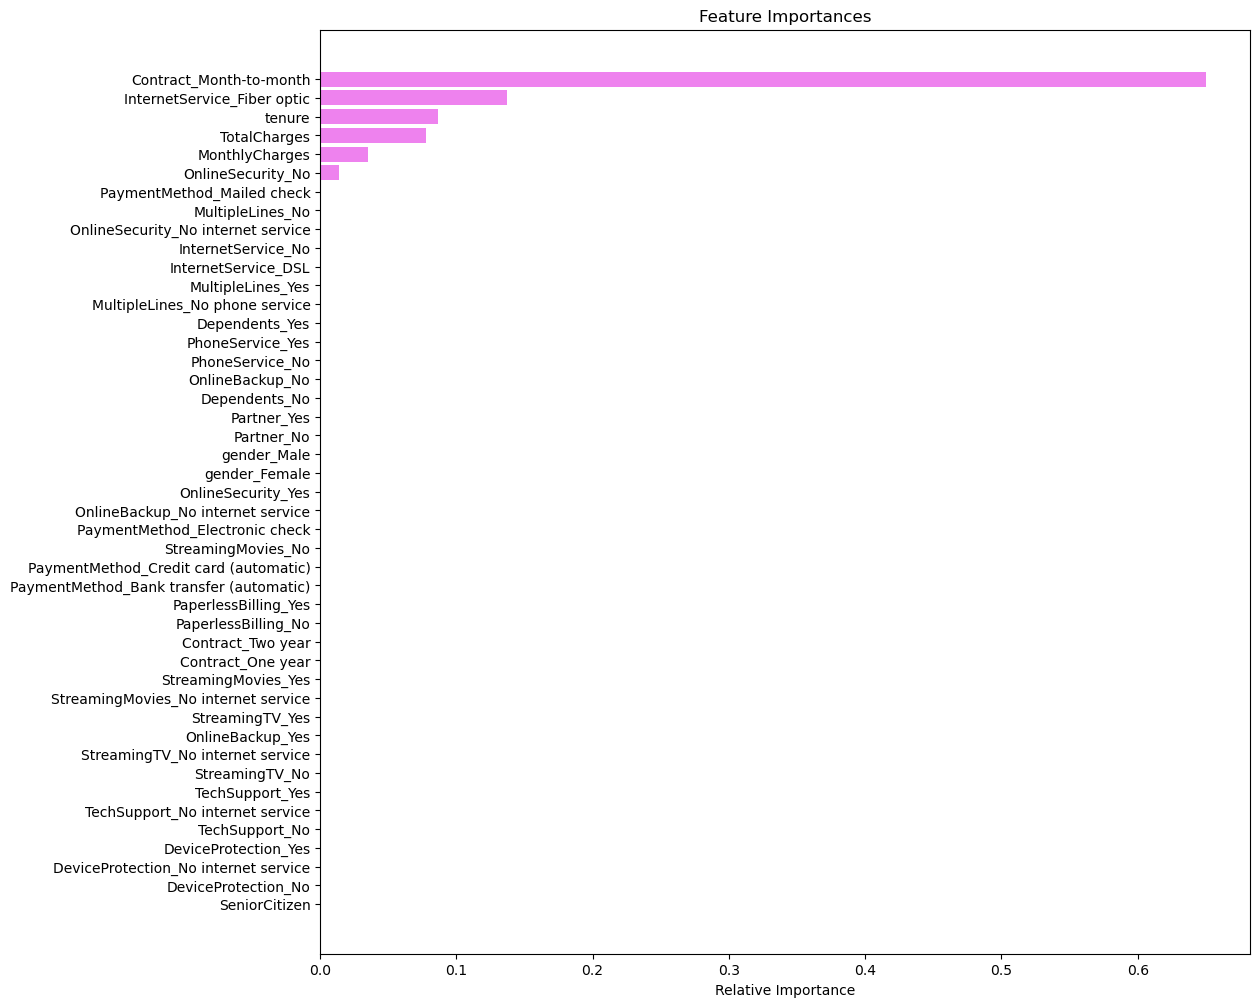

In [40]:
feature_names = X_train.columns
importances = dTree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Let us visualize the chosen model (decision tree tuned)

In [41]:
feature_names = list(X.columns)
print(feature_names)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit 

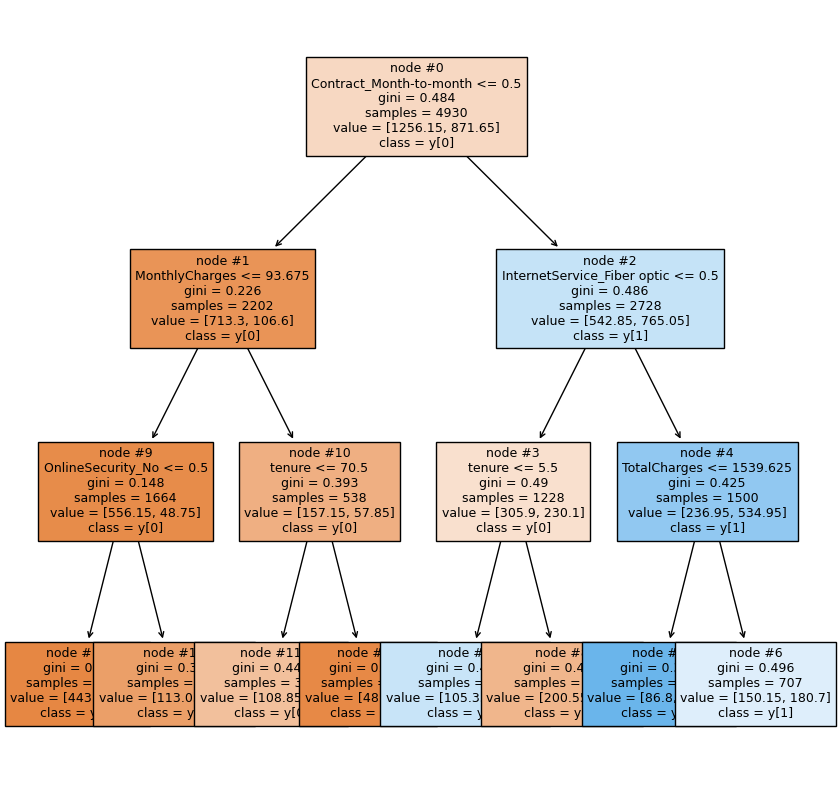

In [42]:
plt.figure(figsize=(10, 10))
tree.plot_tree(
    dTree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

# Conclusion

### From overall scores of all 3 models, we can see that Decision Tree Tuned outperforms other models.

### Some of the key takeaways from our analysis are :

#### Risk factors for churn
    Customers who are at risk of churning tend to have a shorter tenure with the business. This suggests that customer retention efforts should focus on building long-term relationships and improving customer loyalty. Additionally, customers at risk of churn have high monthly charges but low total charges. This indicates that pricing strategies could be adjusted to offer more attractive pricing options or incentives for customers with high monthly charges.
    Churn characteristics: Churned customers are more likely to have a month-to-month contract, prefer electronic check payments, opt for paperless billing, and have phone service device protection. This suggests that there may be issues with contract terms, payment methods, or service quality that contribute to customer dissatisfaction. Identifying and addressing these pain points could help reduce churn rates.

#### Churn characteristics 
    Churned customers are more likely to have a month-to-month contract, prefer electronic check payments, opt for paperless billing, and have phone service device protection. This suggests that there may be issues with contract terms, payment methods, or service quality that contribute to customer dissatisfaction. Identifying and addressing these pain points could help reduce churn rates.


#### Retained customer characteristics
    Retained customers tend to have features such as tech support, online backup, online security, and dependents. This implies that providing comprehensive technical support and ensuring data security can contribute to customer satisfaction and retention. Additionally, catering to the needs of customers with dependents by offering family plans or bundled services could improve customer loyalty.

#### Important predictor variables 
    According to the decision tree model, the most important variables for predicting churn are the month-to-month contract, tenure, InternetService_Fiber optic, and total charges. These insights can guide targeted retention strategies. For example, offering incentives or discounts for customers with longer contract terms or providing better service options for customers using fiber optic internet services could help reduce churn rates.

### By combining the findings from the EDA and the modeling findings, Telco can gain valuable insights into the factors that drive churn and devise targeted strategies to improve customer retention. It is important to continually monitor these factors and adapt retention efforts based on changing customer preferences and needs.